In [98]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8



In [99]:
bank = "C:/Users/Dell/Downloads/bank.csv"

In [100]:
df = pd.read_csv(bank, sep=';')

In [101]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [102]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [103]:
df.shape

(41188, 21)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [105]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [106]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [107]:
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

<AxesSubplot:xlabel='age', ylabel='count'>

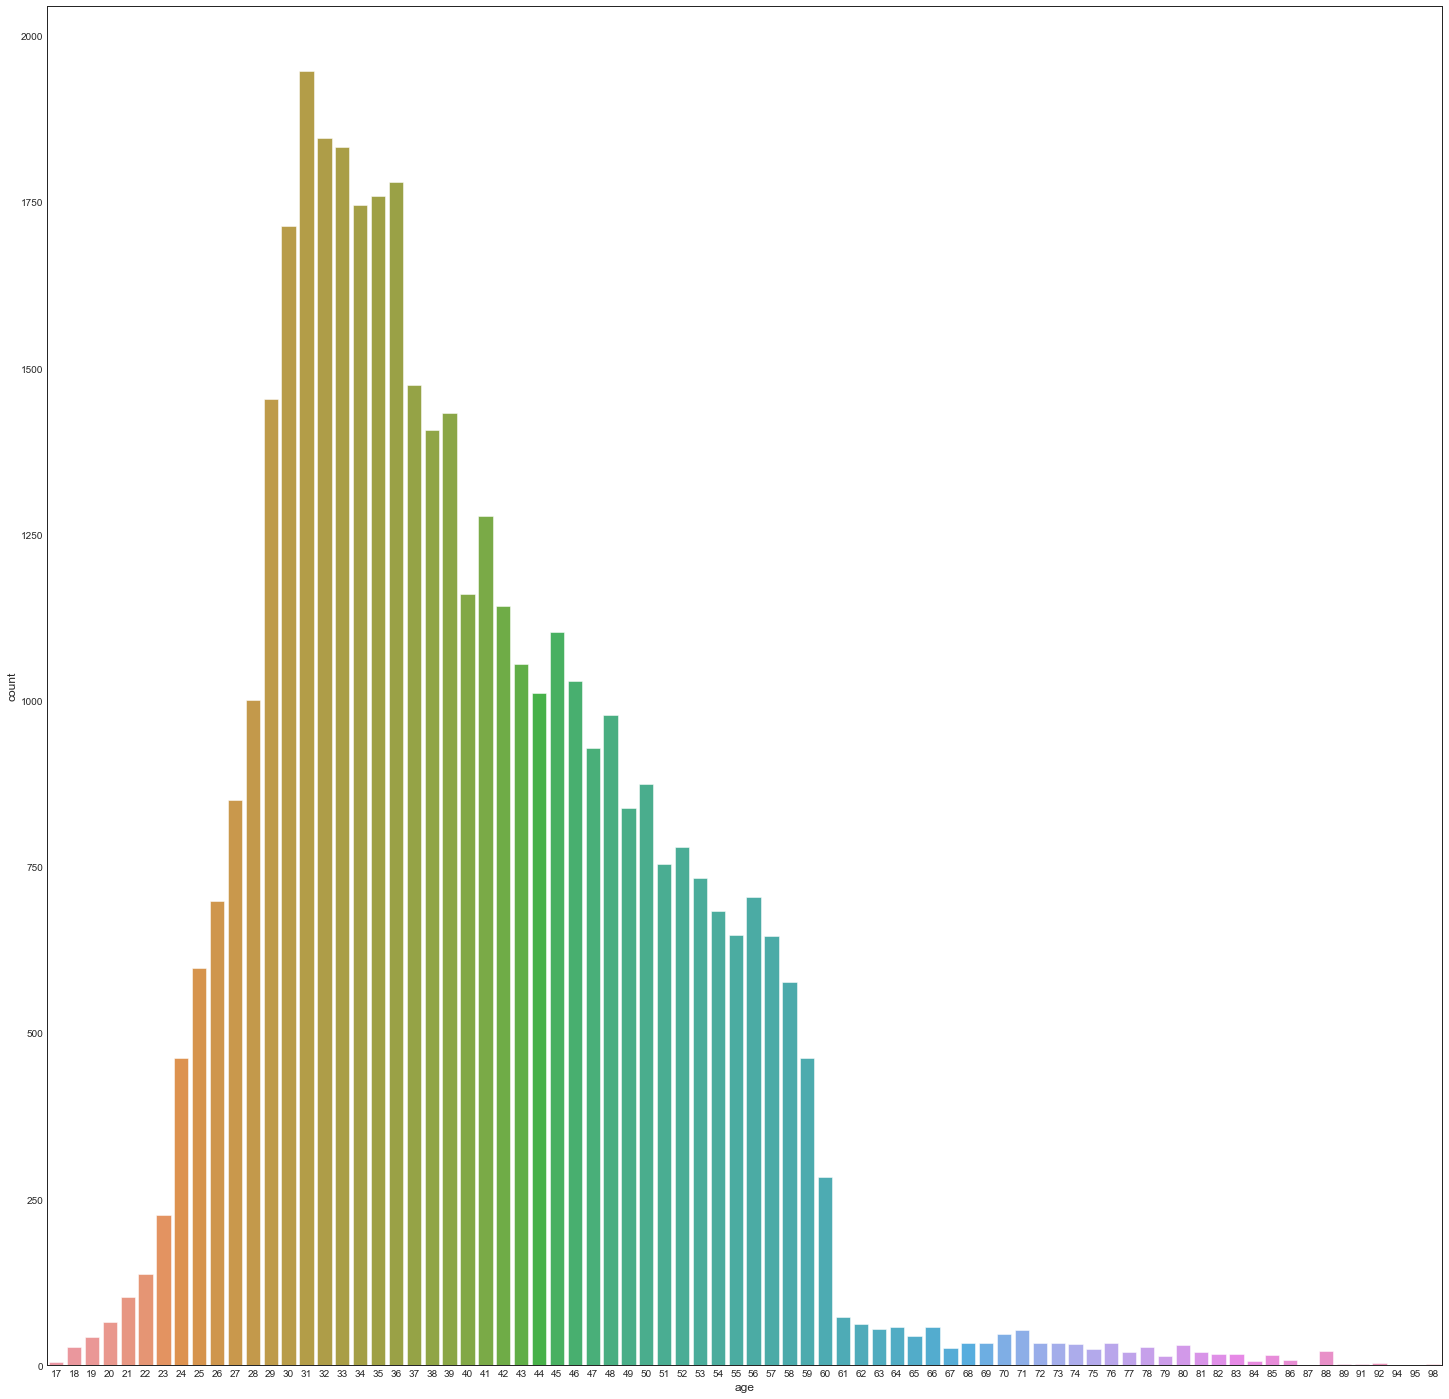

In [108]:
plt.figure(figsize=(25,25))
sns.countplot(x = 'age',data = df)

<AxesSubplot:xlabel='job', ylabel='count'>

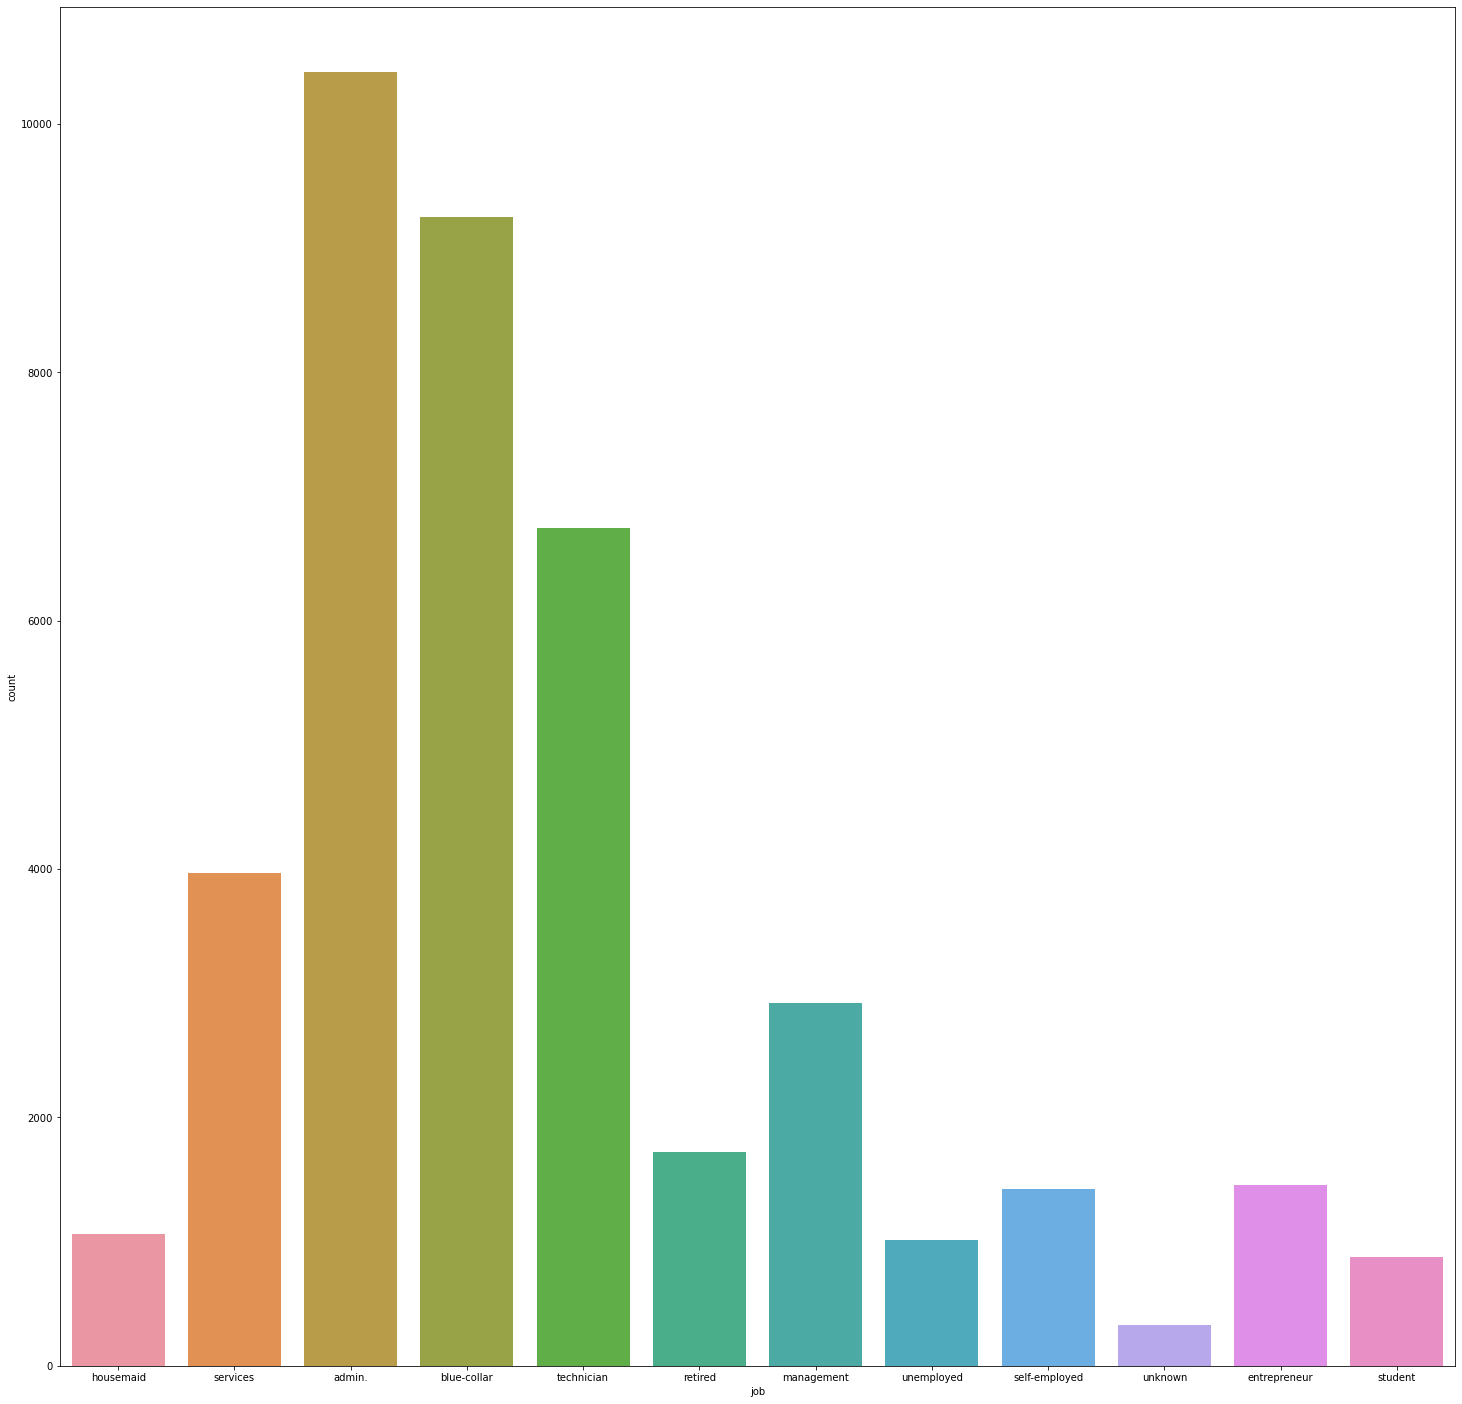

In [32]:
plt.figure(figsize=(25,25))
sns.countplot(x = 'job',data = df)

<AxesSubplot:xlabel='marital', ylabel='count'>

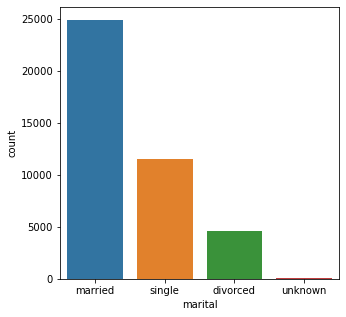

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'marital',data = df)

<AxesSubplot:xlabel='education', ylabel='count'>

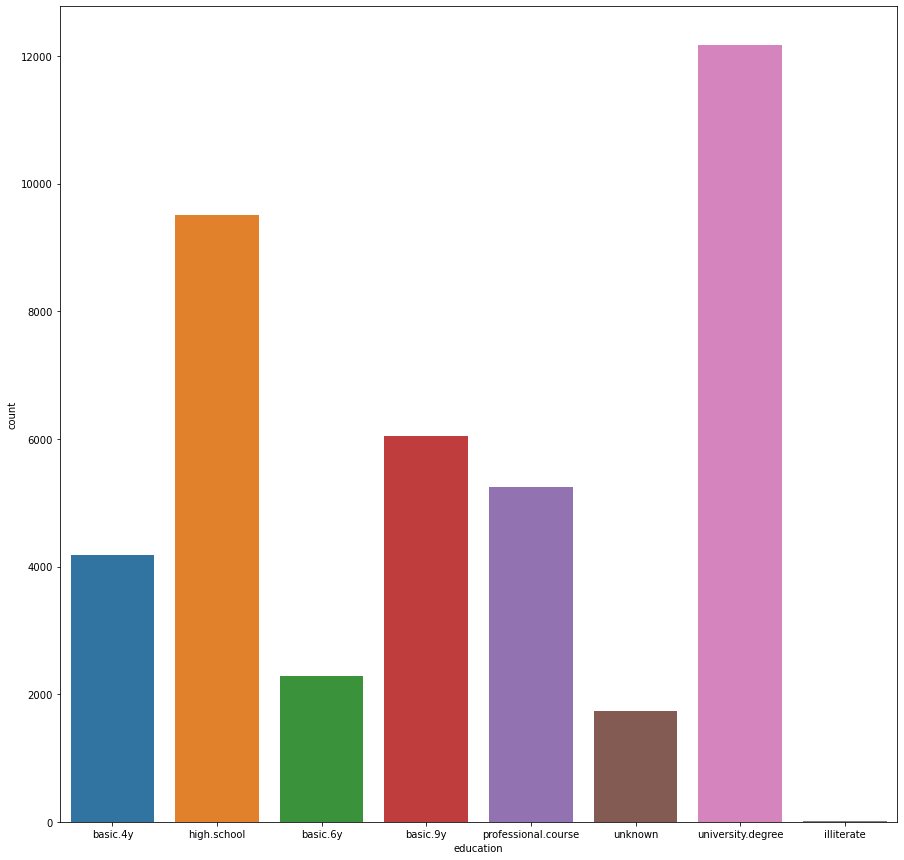

In [34]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'education',data = df)

<AxesSubplot:xlabel='default', ylabel='count'>

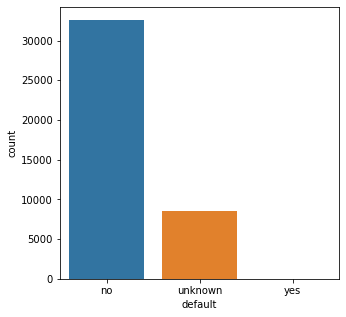

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'default',data = df)

<AxesSubplot:xlabel='housing', ylabel='count'>

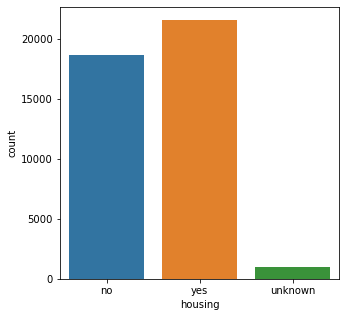

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'housing',data = df)

<AxesSubplot:xlabel='loan', ylabel='count'>

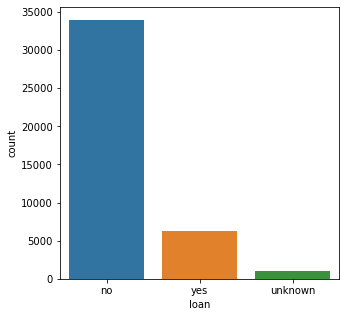

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'loan',data = df)

<AxesSubplot:xlabel='contact', ylabel='count'>

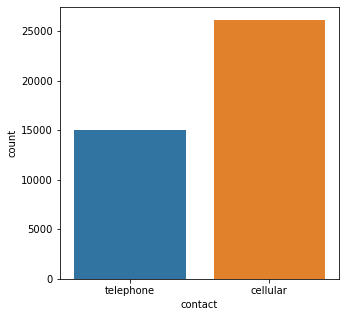

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'contact',data = df)

<BarContainer object of 41188 artists>

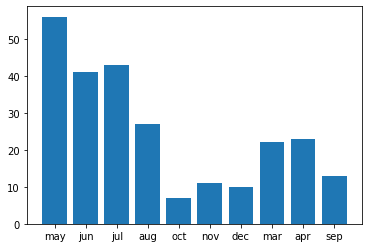

In [39]:
plt.bar(df['month'], df['campaign'])

<AxesSubplot:xlabel='education'>

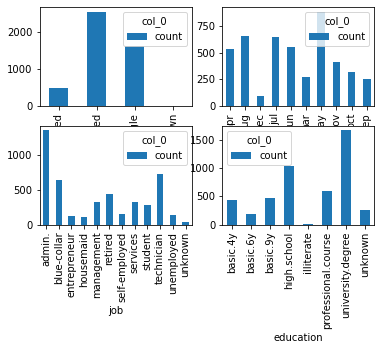

In [40]:
bank = df[df['y']=='yes']


df1 = pd.crosstab(index = bank["marital"],columns="count")    
df2 = pd.crosstab(index = bank["month"],columns="count")  
df3= pd.crosstab(index = bank["job"],columns="count") 
df4=pd.crosstab(index = bank["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])  

In [ ]:
categorical_df = df[['job','education','default','housing','loan']]
categorical_df.head(3)

In [43]:
df.shape

(41188, 21)

Text(0.5, 1.0, 'No of employees')

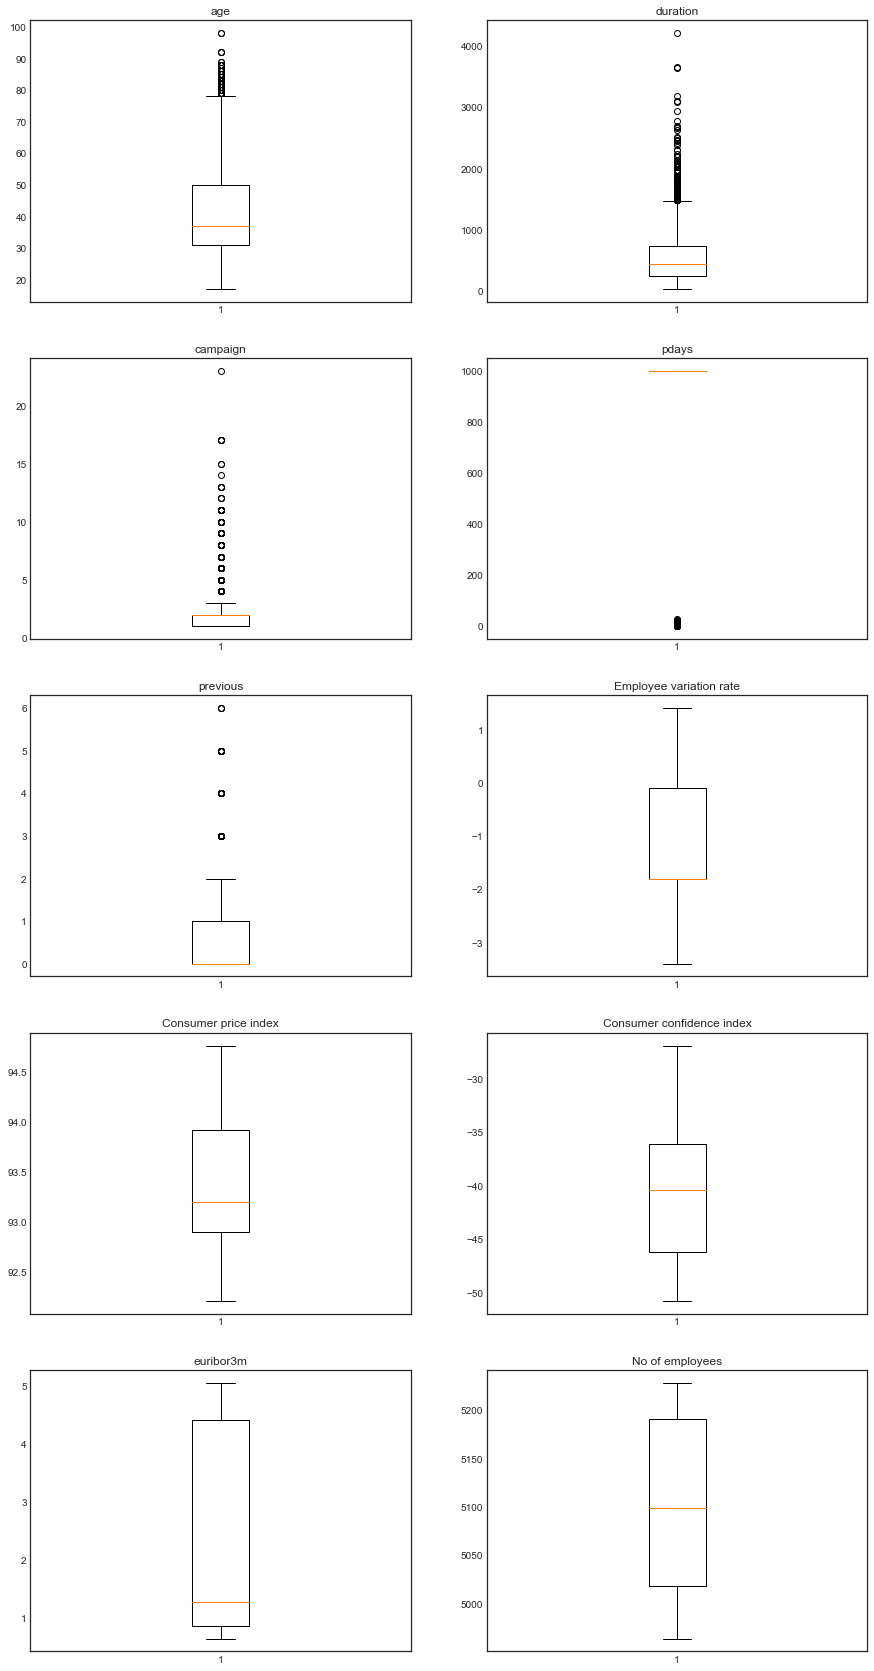

In [45]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank['nr.employed'])
ax.set_title('No of employees')

In [49]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank[cols].quantile(0.25)
    Q3 = bank[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank[cols] >= Q1 - 1.5 * IQR) & (bank[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank.loc[filter]

Text(0.5, 1.0, 'campaign')

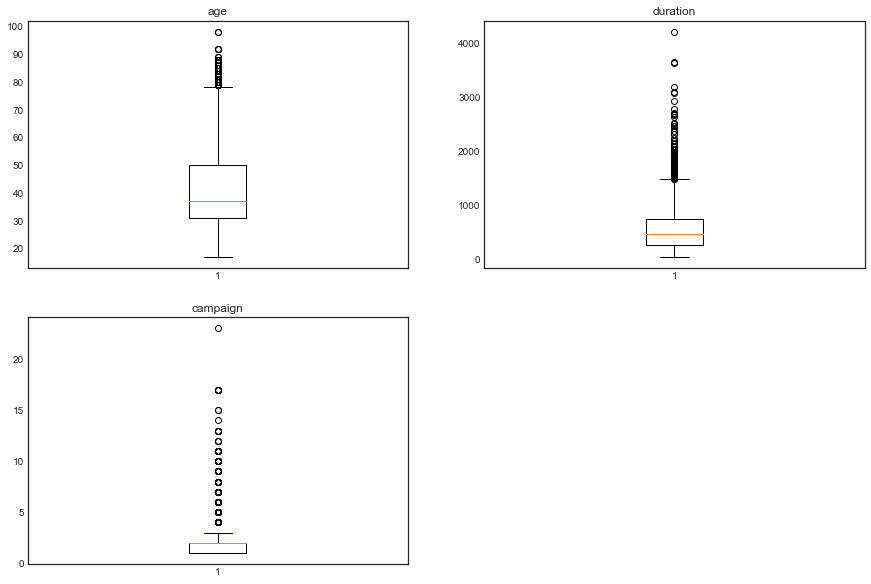

In [50]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank['campaign'])
ax.set_title('campaign')

In [48]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

university.degree      1627
middle.school          1041
high.school            1008
professional.course     575
unknown                 247
illiterate                4
Name: education, dtype: int64

In [51]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 

In [52]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
83,5,2
88,5,2
129,5,2
139,5,2
182,5,2


In [53]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [54]:
bank_features['pdays'].value_counts()

0     3549
3      298
6      288
4       63
7       40
2       37
9       35
10      29
5       29
13      28
12      25
15      16
11      15
14      11
8       11
1        8
16       6
18       4
21       2
22       2
17       2
25       1
26       1
27       1
19       1
Name: pdays, dtype: int64

In [55]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [56]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [57]:


bank_features.loc[:,['housing','default','loan','y']].head()



,housing,default,loan,y
83,1,-1,0,1
88,0,0,0,1
129,1,-1,0,1
139,1,-1,0,1
182,1,0,1,1


In [58]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [59]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
83,1,1,0
88,1,1,0
129,1,1,0
139,1,1,0
182,1,1,0


In [60]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [62]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [63]:
bank_features.loc[:,['job','education']].head()

,job,education
83,118,1627
88,710,1041
129,710,575
139,600,1041
182,600,1041


In [64]:
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    1.0
married     1.0
single      1.0
unknown     1.0
Name: y, dtype: float64

In [65]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [66]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [67]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [68]:
bank_features.marital_ordinal.value_counts()

1    2446
2    1585
0     460
3      11
Name: marital_ordinal, dtype: int64

In [69]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [70]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,118,1627,-1,1,0,5,2,1,1,1,...,0.576682,1.653227,-0.627279,-0.424903,-0.581112,1.479871,0.956204,0.542589,1.619066,1.130607
1,710,1041,0,0,0,5,2,1,1,1,...,0.576682,2.979579,-0.627279,-0.424903,-0.581112,1.479871,0.956204,0.542589,1.619066,1.130607
2,710,575,-1,1,0,5,2,1,1,1,...,0.003042,0.208284,-0.627279,-0.424903,-0.581112,1.479871,0.956204,0.542589,1.619066,1.130607
3,600,1041,-1,1,0,5,2,1,1,1,...,0.289862,-0.159974,-0.627279,-0.424903,-0.581112,1.479871,0.956204,0.542589,1.619066,1.130607
4,600,1041,0,1,1,5,2,1,1,1,...,0.074747,0.501642,-0.026170,-0.424903,-0.581112,1.479871,0.956204,0.542589,1.619066,1.130607


In [73]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

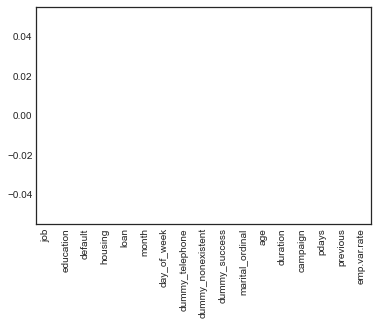

In [75]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='bar')
plt.show()

In [76]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (3601, 15)
Input Test: (901, 15)
Output Training: (3601,)
Output Test: (901,)


In [95]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: nan
Decision Tree Test Accuracy: 1.0
KNN Test Accuracy: 1.0
SVC Test Accuracy: nan
Naive Bayes Test Accuracy: 1.0
